In [2]:
import pandas as pd


In [3]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.head(n=3)

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1


In [4]:
titanic.columns

Index(['Pclass', 'Name', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Embarked', 'Survived'],
      dtype='object')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    882 non-null    int64  
 1   Name      882 non-null    object 
 2   Gender    882 non-null    object 
 3   Age       882 non-null    float64
 4   SibSp     882 non-null    int64  
 5   Parch     882 non-null    int64  
 6   Ticket    882 non-null    object 
 7   Embarked  882 non-null    object 
 8   Survived  882 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.1+ KB


In [6]:
titanic.describe()  

,Pclass,Age,SibSp,Parch,Survived
count,882.000000,882.000000,882.000000,882.000000,882.000000
mean,2.311791,29.541950,0.520408,0.375283,0.377551
std,0.835681,12.783114,1.105210,0.804909,0.485049
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [7]:
titanic.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.344640,0.080974,0.019907,-0.338345
Age,-0.344640,1.000000,-0.230080,-0.155920,-0.048872
SibSp,0.080974,-0.230080,1.000000,0.415633,-0.038739
Parch,0.019907,-0.155920,0.415633,1.000000,0.072772
Survived,-0.338345,-0.048872,-0.038739,0.072772,1.000000


In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

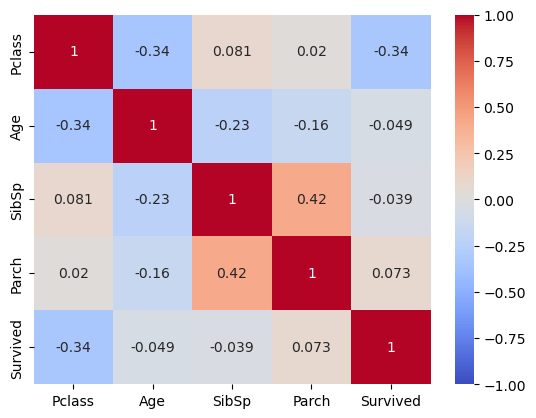

In [9]:
# visualize correlation coefficient
sns.heatmap(titanic.corr(numeric_only=True), cmap="coolwarm", vmin=-1, vmax= 1, annot=True)
plt.show()

In [10]:
# change categorical variable
titanic['Gender'].nunique()

2

In [11]:
titanic['Name'].nunique() # too much

882

In [12]:
titanic['Embarked'].nunique()

3

In [27]:
titanic = pd.get_dummies(data=titanic, columns=['Gender', 'Embarked'], drop_first=True, dtype=int)

KeyError: "None of [Index(['Gender', 'Embarked'], dtype='object')] are in the [columns]"

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       882 non-null    int64  
 1   Name         882 non-null    object 
 2   Age          882 non-null    float64
 3   SibSp        882 non-null    int64  
 4   Parch        882 non-null    int64  
 5   Ticket       882 non-null    object 
 6   Survived     882 non-null    int64  
 7   Gender_male  882 non-null    int32  
 8   Embarked_Q   882 non-null    int32  
 9   Embarked_S   882 non-null    int32  
dtypes: float64(1), int32(3), int64(4), object(2)
memory usage: 58.7+ KB


In [29]:
titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [30]:
titanic.head(n=3)

,Pclass,Age,SibSp,Parch,Survived,Gender_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       882 non-null    int64  
 1   Age          882 non-null    float64
 2   SibSp        882 non-null    int64  
 3   Parch        882 non-null    int64  
 4   Survived     882 non-null    int64  
 5   Gender_male  882 non-null    int32  
 6   Embarked_Q   882 non-null    int32  
 7   Embarked_S   882 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 44.9 KB


---

# Modeling and Prediction

In [32]:
# divide variable (X, y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [33]:
# use scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
pred =lr.predict(X_test)

---

# Estimation

In [41]:
pd.DataFrame({'actual' : y_test, 'pred': pred})


,actual,pred
805,0,0
564,0,0
188,1,1
171,0,0
854,0,0
...,...,...
739,1,0
259,1,0
404,1,0
216,1,1


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # 75% accuracy

0.7570621468926554

### Garbage in, Grabage out 
: biased or poor quality information or input produces a result or output of similar quality.

In [42]:
lr.coef_

array([[-1.20124734, -0.03822153, -0.3658865 , -0.02754353, -2.72917957,
        -0.21878472, -0.41864296]])

In [44]:
# coefficient
pd.Series(lr.coef_[0], index = X_train.columns)

Pclass        -1.201247
Age           -0.038222
SibSp         -0.365887
Parch         -0.027544
Gender_male   -2.729180
Embarked_Q    -0.218785
Embarked_S    -0.418643
dtype: float64

---

# Logistic Regression
### -> only use in binary classification 

오일러 상수로 공식 유도하는 걸 정리하기 ! 오즐레이 쇼 로진?